In [97]:
import scanpy as sc
import pandas as pd
from cellbender.remove_background.downstream import anndata_from_h5
adata_pl=sc.read_10x_h5("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/run2/output_filtered.h5")
adata_pl=anndata_from_h5("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/matrix_filtered_clear/run2/output.h5")

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [53]:
adata_pl

AnnData object with n_obs × n_vars = 18790 × 65597
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

In [375]:
adata_pl_org=sc.read_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Pw_spleenR1.h5ad")

In [376]:
animal=adata_pl_org.obs['soup_assign']

orig.ident  nCount_RNA  nFeature_RNA soup_assign  \
AAACCCAAGACGCTCC-1  Round1_spl      3617.0          2022           0   
AAACCCAAGATCCTAC-1  Round1_spl     39272.0          7633           1   
AAACCCAAGCCGCACT-1  Round1_spl      1822.0          1031           0   
AAACCCAAGCTTTCTT-1  Round1_spl      2281.0          1193           0   
AAACCCAAGGCATCTT-1  Round1_spl      2680.0          1337           0   
...                        ...         ...           ...         ...   
TTTGTTGTCCTTATCA-1  Round1_spl     10147.0          3848           1   
TTTGTTGTCGTGTGAT-1  Round1_spl      1174.0           736           0   
TTTGTTGTCTAATTCC-1  Round1_spl      1604.0           934           0   
TTTGTTGTCTACGGTA-1  Round1_spl     14691.0          4982           0   
TTTGTTGTCTGCGGAC-1  Round1_spl      8902.0          3190           1   

                   soup_status scds_DropletType combined_status  percent.mito  \
AAACCCAAGACGCTCC-1     singlet          singlet       0_singlet      0.047277   
AAACCCAAGATCCTAC-1     singlet          singlet       1_singlet      0.016526   
AAACCCAAGCCGCACT-1     singlet          singlet       0_singlet      0.012623   
AAACCCAAGCTTTCTT-1     singlet          singlet       0_singlet      0.015344   
AAACCCAAGGCATCTT-1     singlet          singlet       0_singlet      0.016045   
...                        ...              ...             ...           ...   
TTTGTTGTCCTTATCA-1     singlet          singlet       1_singlet      0.012023   
TTTGTTGTCGTGTGAT-1     singlet          singlet       0_singlet      0.009370   
TTTGTTGTCTAATTCC-1     singlet          singlet       0_singlet      0.012469   
TTTGTTGTCTACGGTA-1     singlet          singlet       0_singlet      0.013410   
TTTGTTGTCTGCGGAC-1     singlet          singlet       1_singlet      0.043473   

                   RNA_snn_res.0.8 seurat_clusters ident  
AAACCCAAGACGCTCC-1               1               1     1  
AAACCCAAGATCCTAC-1              16              16    16  
AAACCCAAGCCGCACT-1               0               0     0  
AAACCCAAGCTTTCTT-1               0               0     0  
AAACCCAAGGCATCTT-1               0               0     0  
...                            ...             ...   ...  
TTTGTTGTCCTTATCA-1              12              12    12  
TTTGTTGTCGTGTGAT-1               0               0     0  
TTTGTTGTCTAATTCC-1               0               0     0  
TTTGTTGTCTACGGTA-1               6               6     6  
TTTGTTGTCTGCGGAC-1               6               6     6  

[19045 rows x 11 columns]

In [ ]:
#Transfer metadata from adata_pl_org to adata_pl

In [98]:
mapper=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/aPlwal.pri.V2.genome.annots.tsv")
mapper_dict = mapper.set_index('#gene_id')['EggNM.Preferred_name'].to_dict()

new_var_names_pl = []  # Create an empty list to store the updated variable names

# Iterate through each gene_id in the mapper_dict
for gene_id in adata_pl.var_names:
    # Check if the gene_id exists in adata_pl.var_names and if its mapping is not '.'
    if gene_id in mapper_dict.keys() and mapper_dict[gene_id] != '.':
        # Debugging: Print gene_id and its mapping
        print(f"Updating: {gene_id} -> {mapper_dict[gene_id]}")
        # If conditions are met, append the mapped gene_id to new_var_names_pl
        new_var_names_pl.append(mapper_dict[gene_id])
    else:
        # Debugging: Print gene_id that's not updated
        print(f"Not Updating: {gene_id}")
        # If conditions are not met, append the original gene_id to new_var_names_pl
        new_var_names_pl.append(gene_id)

# Update the variable names of adata_pl with the new_var_names_pl list
adata_pl.var_names = new_var_names_pl

Not Updating: POL3
Not Updating: gene26597
Not Updating: gene26598
Not Updating: SPX2
Not Updating: gene26599
Not Updating: gene26600
Not Updating: gene26601
Not Updating: gene26602
Updating: gene26603 -> PKNOX2
Not Updating: POL
Not Updating: gene26605
Not Updating: MYPOP
Not Updating: RTXE
Not Updating: HARB1
Not Updating: MYPOP
Not Updating: gene26610
Not Updating: gene26611
Not Updating: LIN1
Not Updating: POL
Not Updating: MYPOP
Not Updating: HARB1
Not Updating: RL23
Not Updating: gene26617
Not Updating: LORF2
Not Updating: gene26619
Not Updating: gene26620
Not Updating: gene26621
Not Updating: PGBD4
Not Updating: gene26623
Not Updating: gene26624
Not Updating: POL
Not Updating: gene26626
Not Updating: POL4
Not Updating: gene26628
Not Updating: gene26629
Not Updating: gene26630
Not Updating: LORF2
Not Updating: ZN583
Not Updating: PGBD4
Not Updating: PGBD4
Not Updating: SIAE
Not Updating: gene26636
Not Updating: gene26637
Not Updating: POL4
Not Updating: gene26639
Not Updating: PO

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


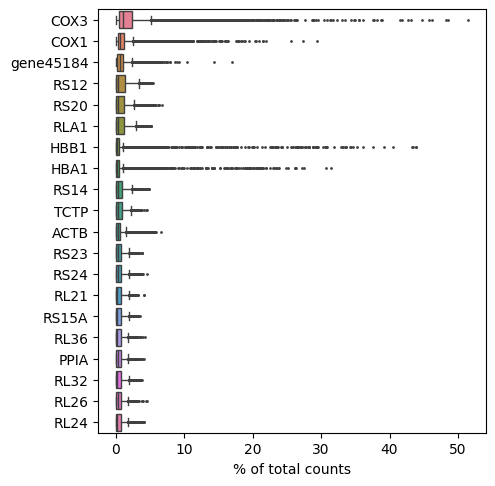

In [383]:
import numpy as np
sc.pl.highest_expr_genes(adata_pl, n_top=20,)

In [384]:
#adata_pl.obs.rename(columns={'n_genes': 'n_genes_by_counts'}, inplace=True)
adata_pl.obs

background_fraction  cell_probability     cell_size  \
barcode                                                                   
CACTAAGTCGGCATAT-1             0.009054          0.999955  66069.031250   
CAGCAATGTCCTACGG-1             0.008527          0.999955  65626.125000   
AGAGAGCTCGACCCAG-1             0.012405          0.999955  50770.105469   
GTTGTAGGTGTTGAGG-1             0.014929          0.999955  72146.414062   
TGTGATGAGAATTGTG-1             0.012294          0.999955  45050.957031   
...                                 ...               ...           ...   
CGGTCAGTCCTCACTG-1             1.000000          0.055549   7482.158691   
GTTACAGCAGTCTCTC-1             1.000000          0.071309   7565.931641   
TCTAACTCACAGGATG-1             1.000000          0.065818   7347.096680   
CGAGGAAAGCCTCTCT-1             1.000000          0.062701   8180.972656   
TAATCTCAGCTCGACC-1             1.000000          0.057147   7545.993164   

                    droplet_efficiency  
barcode                                 
CACTAAGTCGGCATAT-1            2.499887  
CAGCAATGTCCTACGG-1            2.499716  
AGAGAGCTCGACCCAG-1            2.499759  
GTTGTAGGTGTTGAGG-1            1.624732  
TGTGATGAGAATTGTG-1            2.499399  
...                                ...  
CGGTCAGTCCTCACTG-1            0.649382  
GTTACAGCAGTCTCTC-1            0.637274  
TCTAACTCACAGGATG-1            0.669656  
CGAGGAAAGCCTCTCT-1            0.560186  
TAATCTCAGCTCGACC-1            0.639896  

[18790 rows x 4 columns]

In [55]:
#Preprocessing
import re
# Preprocessing steps: filter cells and genes, calculate QC metrics
sc.pp.filter_cells(adata_pl, min_genes=200)
sc.pp.filter_genes(adata_pl, min_cells=3)
# Calculate QC metrics for mitochondrial genes
mt_gene_patterns = ['COX1', 'COX2', 'ATP8', 'ATP6', 'COX3', 'NU1M', 'NU2M', 'NU3M', 'NU4M', 'NU4LM', 'NU5M', 'NU6M', 'CYB']

# Create a regular expression pattern by joining the patterns with the '|' operator
mt_gene_pattern = '|'.join(mt_gene_patterns)

adata_pl.var['mt']=adata_pl.var_names.str.contains(mt_gene_pattern, regex=True)
sc.pp.calculate_qc_metrics(adata_pl, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
# Additional filtering
adata_pl = adata_pl[adata_pl.obs.pct_counts_mt < 5, :]
adata_pl = adata_pl[adata_pl.obs.n_genes_by_counts < 2500, :]
adata_pl.var_names_make_unique()

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/nikvaku/.local/lib/python3.9/site-packages/a

In [395]:
adata_pl

AnnData object with n_obs × n_vars = 17610 × 37128
    obs: 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'ambient_expression', 'feature_type', 'genome', 'gene_id', 'cellbender_analyzed', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'cell_size_lognormal_std', 'empty_droplet_size_lognormal_loc', 'empty_droplet_size_lognormal_scale', 'swapping_fraction_dist_params', 'estimator', 'features_analyzed_inds', 'fraction_data_used_for_testing', 'learning_curve_learning_rate_epoch', 'learning_curve_learning_rate_value', 'learning_curve_test_elbo', 'learning_curve_test_epoch', 'learning_curve_train_elbo', 'learning_curve_train_epoch', 'target_false_positive_rate'
    obsm: 'gene_expression_encoding'

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


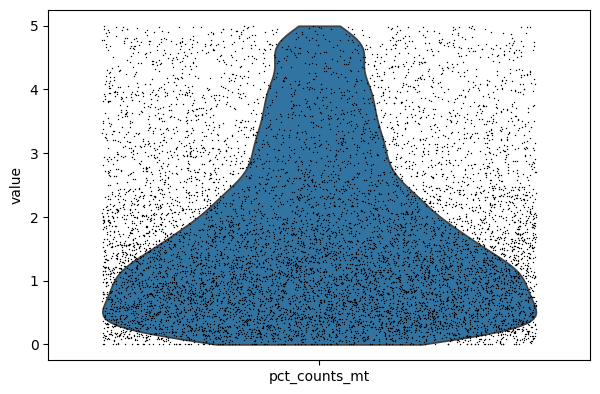

In [26]:
#Plot Violin plot
sc.pl.violin(adata_pl, ['pct_counts_mt'],jitter=0.4)

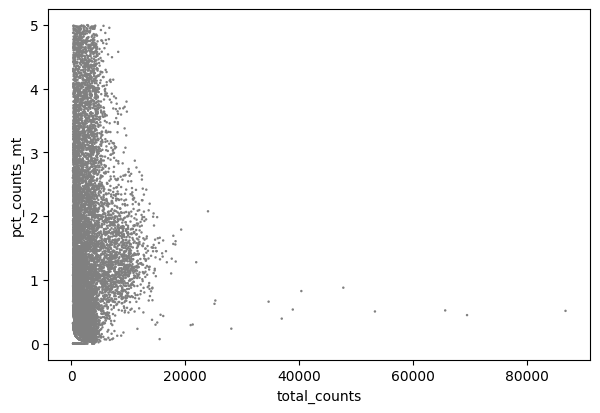

In [27]:
#Barplot between counts and mt content
sc.pl.scatter(adata_pl, x='total_counts', y='pct_counts_mt')

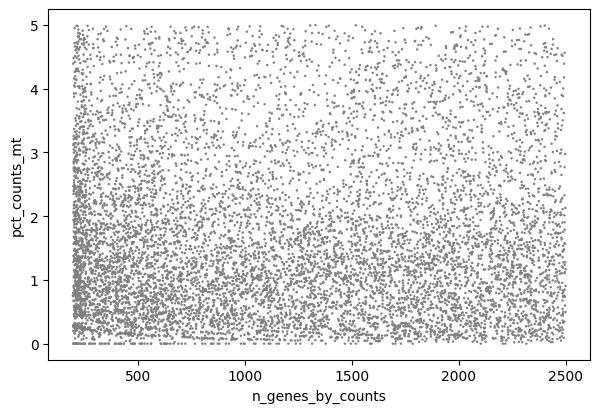

In [28]:
sc.pl.scatter(adata_pl, x='n_genes_by_counts', y='pct_counts_mt')

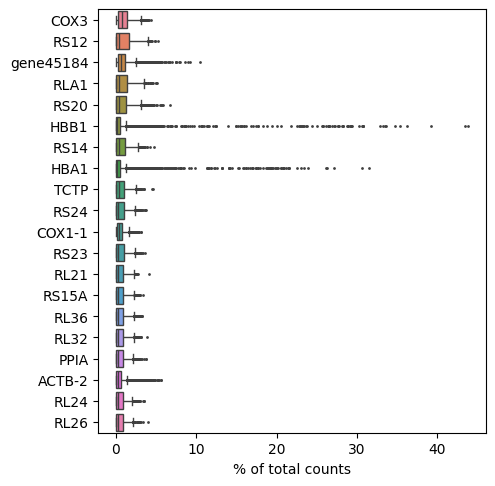

In [29]:
sc.pl.highest_expr_genes(adata_pl, n_top=20,)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_anndata.py:843: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  ax = sns.violinplot(


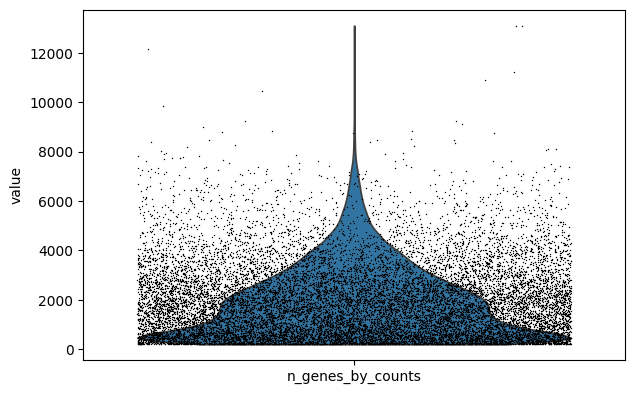

In [399]:
sc.pl.violin(adata_pl, ['n_genes_by_counts'],jitter=0.4)

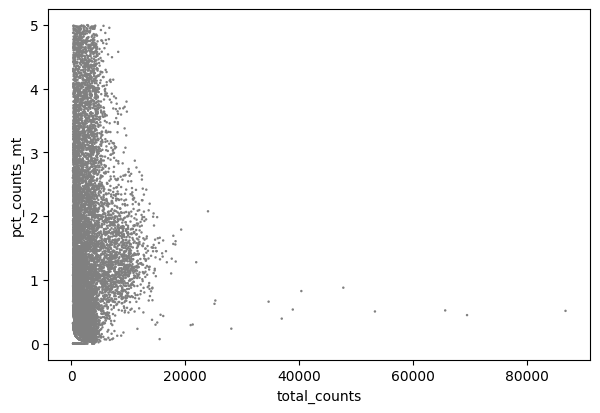

In [30]:
sc.pl.scatter(adata_pl, x='total_counts', y='pct_counts_mt')

In [56]:
#Processing the data
sc.pp.normalize_total(adata_pl, target_sum=1e4)
sc.pp.log1p(adata_pl)
sc.pp.highly_variable_genes(adata_pl, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:216: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


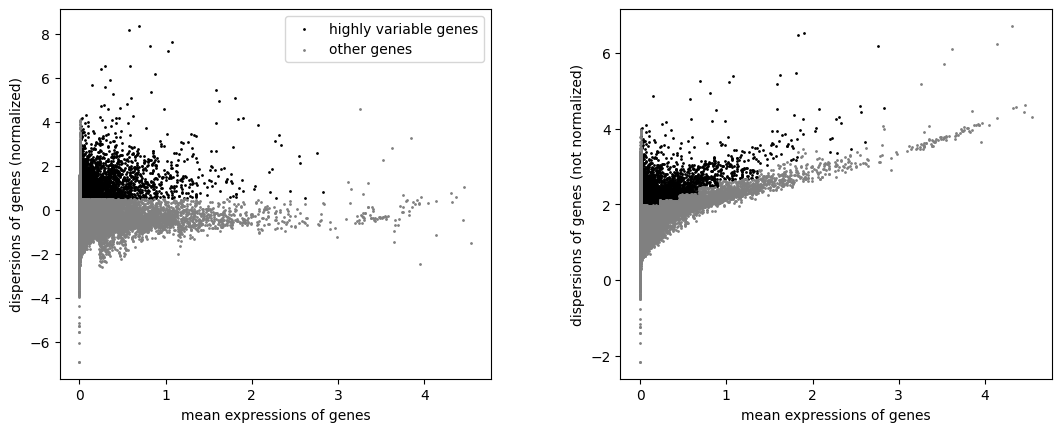

In [57]:
sc.pl.highly_variable_genes(adata_pl)

In [58]:
sc.pp.scale(adata_pl, max_value=10)

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


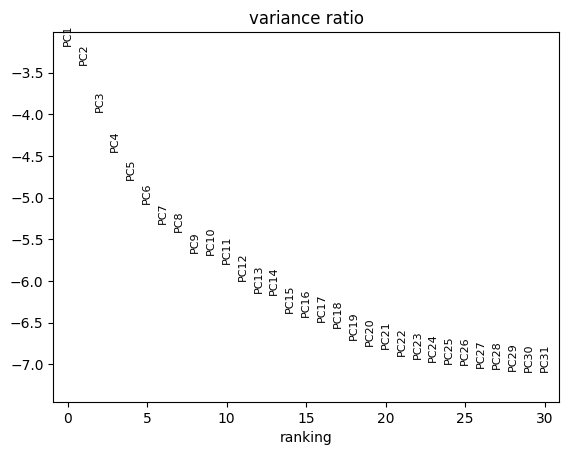

In [59]:
#PCA and UMAP
sc.tl.pca(adata_pl, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_pl, log=True)

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1217: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


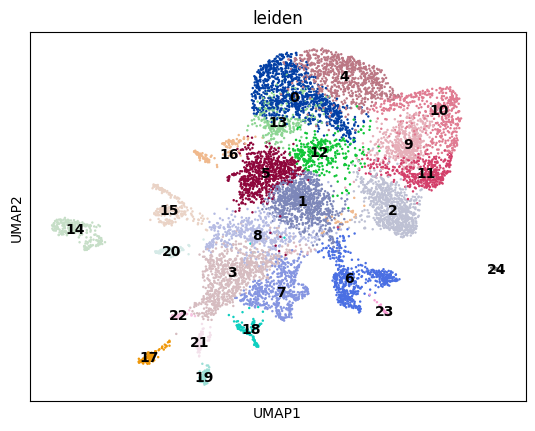

In [60]:
sc.pp.neighbors(adata_pl, n_neighbors=30, n_pcs=30)
sc.tl.umap(adata_pl)
sc.tl.leiden(adata_pl, resolution=1)
sc.pl.umap(adata_pl, color=['leiden'], legend_loc='on data')

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


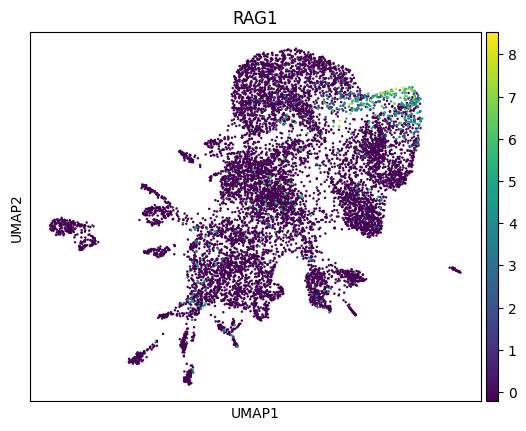

In [39]:
sc.pl.umap(adata_pl,color="RAG1")

/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1208: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


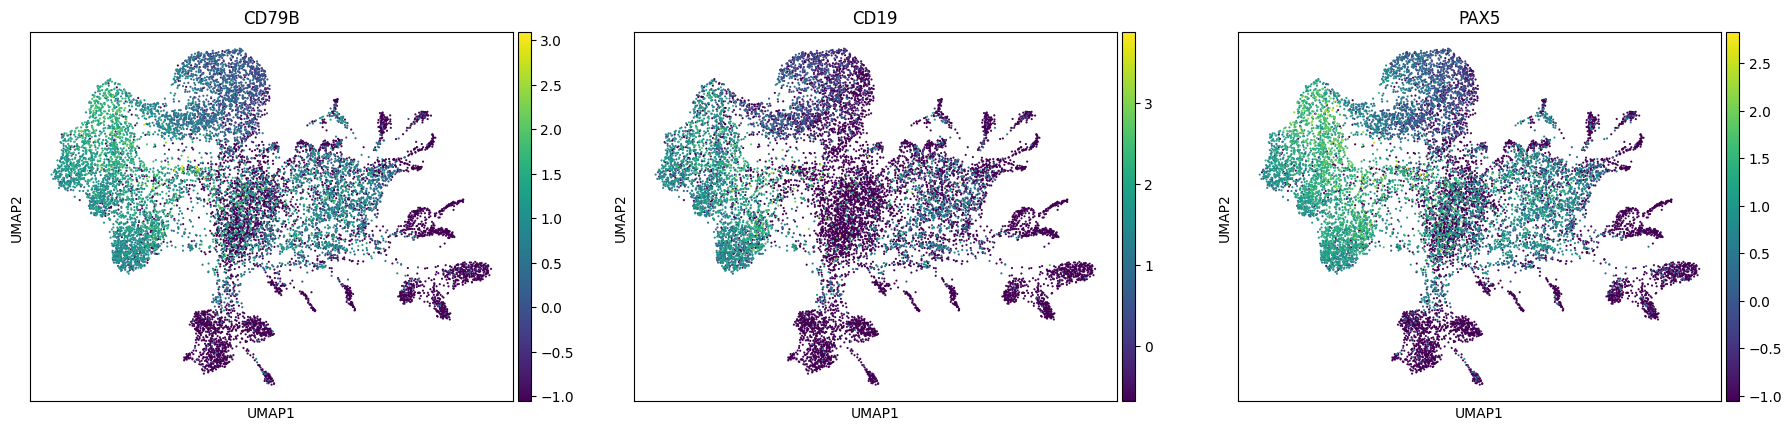

In [326]:
sc.pl.umap(adata_pl,color=["CD79B","CD19","PAX5"])

In [327]:
for i in adata_pl.var_names:
    if i.startswith("CD2"):
        print(i)

CD276
CD20B
CD28
CD226
CD2AP
CD2B2
CD22
CD22-1
CD2
CD276-1
CD247
CD209


/home/nikvaku/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/nikvaku/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_group

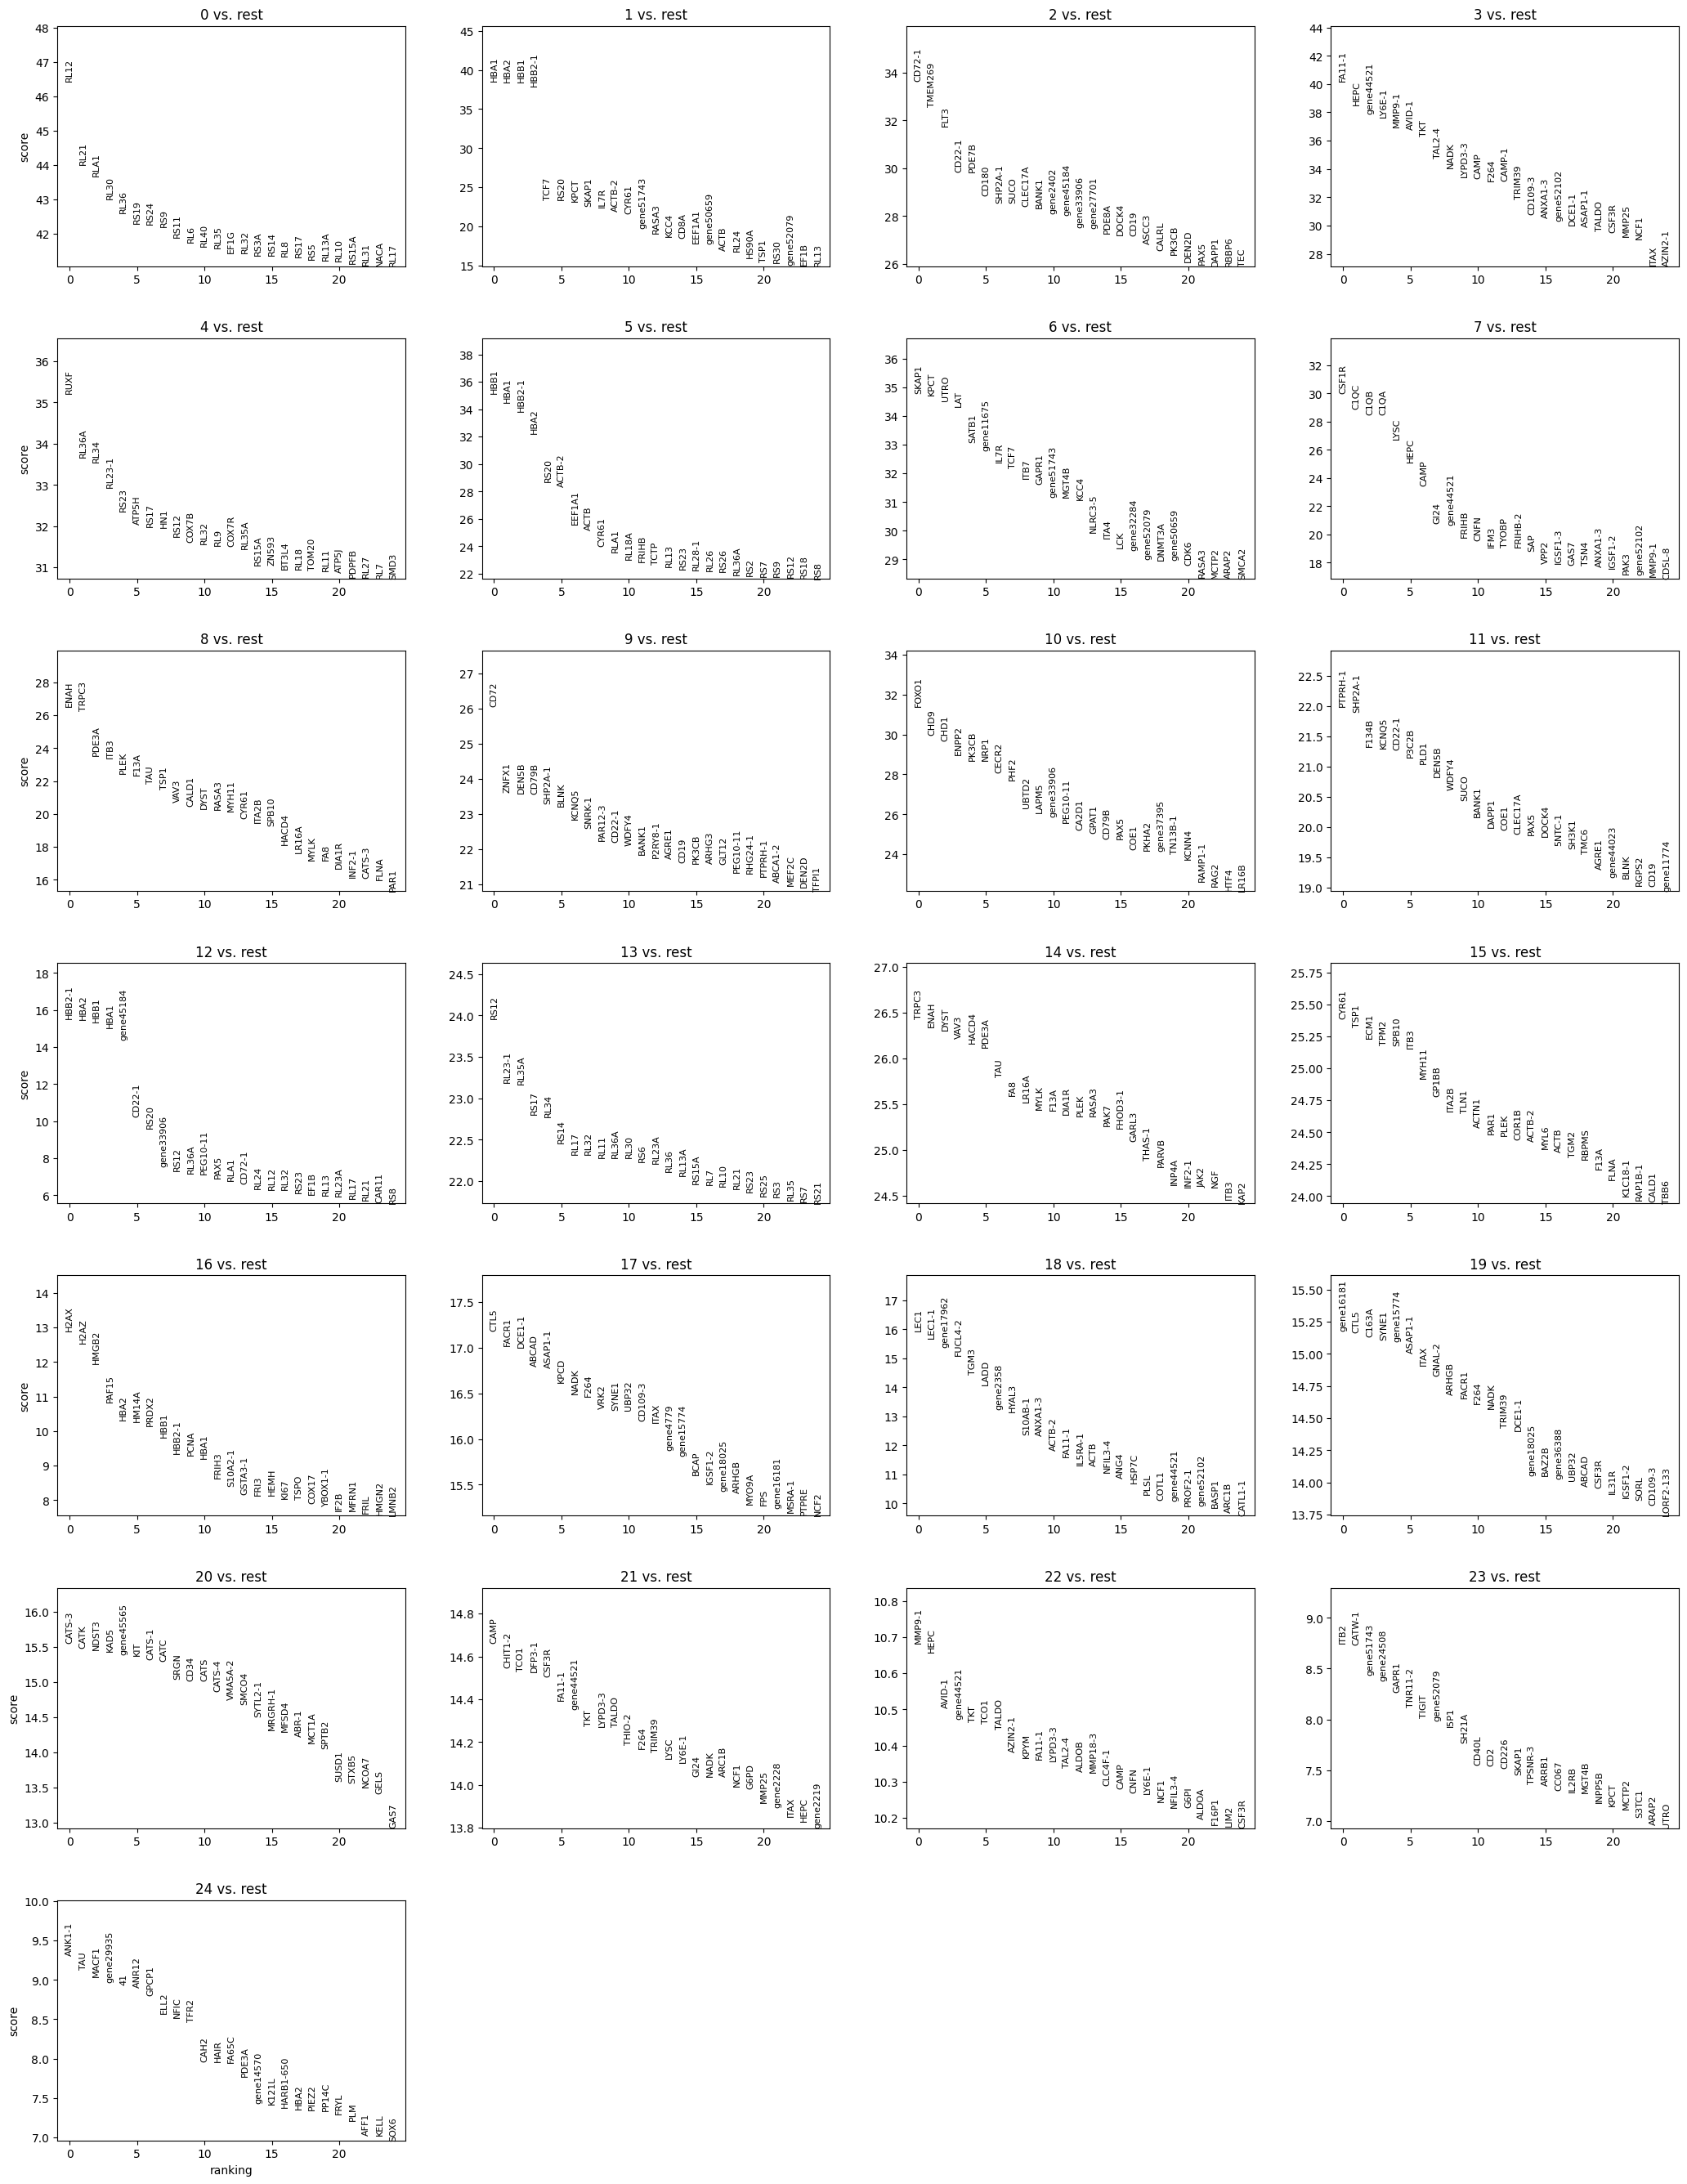

In [40]:
#Perform differential expression analysis
sc.tl.rank_genes_groups(adata_pl, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_pl, n_genes=25, sharey=False)

In [41]:
#Save the object
#adata_pl_sub.write_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl_run2.h5ad")

NameError: name 'adata_pl_sub' is not defined

In [330]:
#leiden=adata_pl.obs['leiden']

In [331]:
#leiden

In [332]:
#adata_pl.obs['leiden']=leiden

In [333]:
#adata_pl.obs['leiden']

In [334]:
#adata_pl.obs.index

In [335]:
#Subsetting the data
#cells=adata_pl.obs.index
#leiden=adata_pl.obs['leiden']
#adata_pl_sub=adata_pl[cells]

In [336]:
#adata_pl_sub

In [337]:
#adata_pl_sub=adata_pl[cells]
#adata_pl_sub.obs['leiden']=leiden

In [338]:
#adata_pl_sub.obs['leiden']

In [339]:
#make variable names unique
#adata_pl_sub.var_names_make_unique()

In [74]:
#Import souporcell data
spleen_souporcell=pd.read_table("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nick/Pleuro/outs/20230704_spleen_R1_soup/20230603_24h_soup_res/clusters.tsv")

In [62]:
spleen_souporcell_singlet=spleen_souporcell[spleen_souporcell['status']=='singlet']

In [75]:
spleen_souporcell['status'].value_counts()

status
singlet       20694
doublet       10291
unassigned     2590
Name: count, dtype: int64

In [343]:
spleen_souporcell_singlet

barcode   status assignment  singlet_posterior  \
0      AAACCCAAGACGCTCC-1  singlet          0           1.000000   
1      AAACCCAAGATCCTAC-1  singlet          1           1.000000   
2      AAACCCAAGCCGCACT-1  singlet          0           1.000000   
4      AAACCCAAGCTTTCTT-1  singlet          0           1.000000   
6      AAACCCAAGGCATCTT-1  singlet          0           1.000000   
...                   ...      ...        ...                ...   
33570  TTTGTTGTCCTTATCA-1  singlet          1           1.000000   
33571  TTTGTTGTCGTGTGAT-1  singlet          0           1.000000   
33572  TTTGTTGTCTAATTCC-1  singlet          0           0.999999   
33573  TTTGTTGTCTACGGTA-1  singlet          0           1.000000   
33574  TTTGTTGTCTGCGGAC-1  singlet          1           1.000000   

       doublet_posterior  log_prob_singleton  log_prob_doublet     cluster0  \
0               0.000000         -301.963147       -376.527277  -301.963147   
1               0.000000        -2112.379393      -3023.262770 -4540.653961   
2               0.052198         -108.464387       -111.363483  -108.464387   
4               0.019293         -148.872530       -152.801065  -148.872530   
6               0.025269         -162.377212       -166.029784  -162.377212   
...                  ...                 ...               ...          ...   
33570           0.000000         -473.396573       -685.476398 -1157.135002   
33571           0.024682          -67.755812        -71.432507   -67.755812   
33572           0.007775          -62.902947        -67.752006   -62.902947   
33573           0.000000        -1194.160338      -1295.779415 -1194.160338   
33574           0.000000         -230.208760       -281.142829  -372.550058   

          cluster1     cluster2  
0      -583.471541  -693.971984  
1     -2112.379393 -5531.126940  
2      -140.623852  -155.179660  
4      -187.814607  -197.468175  
6      -204.532057  -226.069223  
...            ...          ...  
33570  -473.396573 -1210.150476  
33571  -110.078380  -100.316988  
33572   -87.334812   -95.160920  
33573 -1906.001378 -1879.515143  
33574  -230.208760  -439.023750  

[20694 rows x 10 columns]

In [76]:
#Create a dictionary
souporcell_dict = dict(zip(spleen_souporcell['barcode'], spleen_souporcell['status']))

In [99]:
#Map the dictionary to adata_pl
adata_pl.obs['soup_assign'] = adata_pl.obs.index.map(souporcell_dict)
#Select only singlets
adata_pl_sub = adata_pl[adata_pl.obs['soup_assign'] == 'singlet', :]

/home/nikvaku/.local/lib/python3.9/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [100]:
adata_pl.obs['soup_assign'].value_counts()

soup_assign
singlet       13710
doublet        3766
unassigned      324
Name: count, dtype: int64

In [104]:
adata_pl_org.obs

orig.ident  nCount_RNA  nFeature_RNA soup_assign  \
AAACCCAAGACGCTCC-1  Round1_spl      3617.0          2022           0   
AAACCCAAGATCCTAC-1  Round1_spl     39272.0          7633           1   
AAACCCAAGCCGCACT-1  Round1_spl      1822.0          1031           0   
AAACCCAAGCTTTCTT-1  Round1_spl      2281.0          1193           0   
AAACCCAAGGCATCTT-1  Round1_spl      2680.0          1337           0   
...                        ...         ...           ...         ...   
TTTGTTGTCCTTATCA-1  Round1_spl     10147.0          3848           1   
TTTGTTGTCGTGTGAT-1  Round1_spl      1174.0           736           0   
TTTGTTGTCTAATTCC-1  Round1_spl      1604.0           934           0   
TTTGTTGTCTACGGTA-1  Round1_spl     14691.0          4982           0   
TTTGTTGTCTGCGGAC-1  Round1_spl      8902.0          3190           1   

                   soup_status scds_DropletType combined_status  percent.mito  \
AAACCCAAGACGCTCC-1     singlet          singlet       0_singlet      0.047277   
AAACCCAAGATCCTAC-1     singlet          singlet       1_singlet      0.016526   
AAACCCAAGCCGCACT-1     singlet          singlet       0_singlet      0.012623   
AAACCCAAGCTTTCTT-1     singlet          singlet       0_singlet      0.015344   
AAACCCAAGGCATCTT-1     singlet          singlet       0_singlet      0.016045   
...                        ...              ...             ...           ...   
TTTGTTGTCCTTATCA-1     singlet          singlet       1_singlet      0.012023   
TTTGTTGTCGTGTGAT-1     singlet          singlet       0_singlet      0.009370   
TTTGTTGTCTAATTCC-1     singlet          singlet       0_singlet      0.012469   
TTTGTTGTCTACGGTA-1     singlet          singlet       0_singlet      0.013410   
TTTGTTGTCTGCGGAC-1     singlet          singlet       1_singlet      0.043473   

                   RNA_snn_res.0.8 seurat_clusters ident  
AAACCCAAGACGCTCC-1               1               1     1  
AAACCCAAGATCCTAC-1              16              16    16  
AAACCCAAGCCGCACT-1               0               0     0  
AAACCCAAGCTTTCTT-1               0               0     0  
AAACCCAAGGCATCTT-1               0               0     0  
...                            ...             ...   ...  
TTTGTTGTCCTTATCA-1              12              12    12  
TTTGTTGTCGTGTGAT-1               0               0     0  
TTTGTTGTCTAATTCC-1               0               0     0  
TTTGTTGTCTACGGTA-1               6               6     6  
TTTGTTGTCTGCGGAC-1               6               6     6  

[19045 rows x 11 columns]

In [106]:
#Add in the animal label
adata_pl_org=sc.read_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/Pw_spleenR1.h5ad")
animal_mapper=dict(zip(adata_pl_org.obs.index, adata_pl_org.obs['soup_assign']))
adata_pl.obs['Animal']=None
#Map the dictionary to adata_pl
for cell_identifier in adata_pl.obs.index:
    if cell_identifier in animal_mapper:
        adata_pl.obs.at[cell_identifier, 'Animal'] = animal_mapper[cell_identifier]

In [107]:
adata_pl.obs["soup_assign"].value_counts()

soup_assign
singlet       13710
doublet        3766
unassigned      324
Name: count, dtype: int64

In [108]:
adata_pl.obs["Animal"].value_counts()

Animal
2    4232
0    4156
1    4108
Name: count, dtype: int64

In [109]:
#Save the data
adata_pl.write_h5ad("/home/nikvaku/snic2022-6-312/LabMemberScratchDir/Nikhilesh/Raw_data/Anno/adata_pl_soupdoublets&mito_filtered_animal_labelled.h5ad")